### Multiclass model evaluation. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('../../data/emotion/merged_training.pkl')
df.shape

(416809, 2)

In [3]:
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [4]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape

((333447, 2), (83362, 2))

In [5]:
from nbc import NBCtext

In [6]:
_nbc = NBCtext()

In [7]:
%%time
_nbc.fit(X_train)

CPU times: user 1min 3s, sys: 227 ms, total: 1min 3s
Wall time: 1min 3s


In [8]:
X_test['predict'] = X_test.text.apply(lambda x: _nbc.predict(x, alpha = 1, soft = False))

### Confusion Matrix for multiclass classification

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [10]:
sns.set_theme(context = 'notebook', style = "white", font_scale = 1.0)

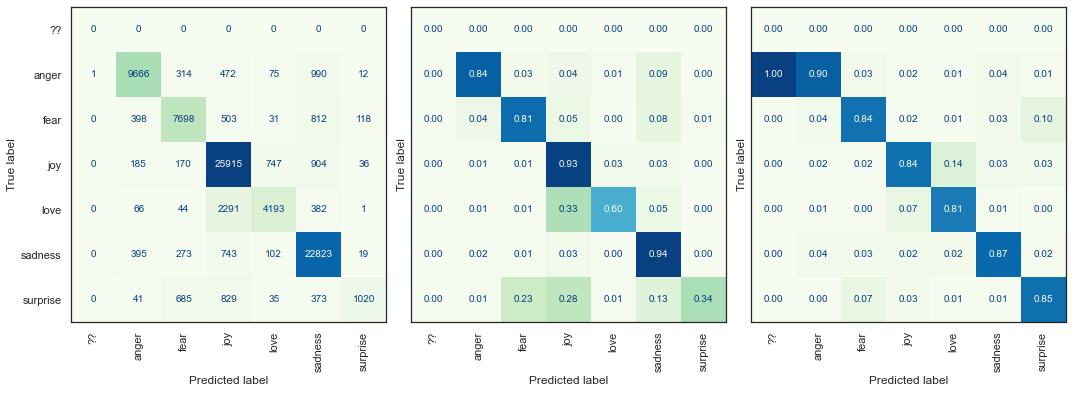

In [11]:
_, axs = plt.subplots(1, 3, figsize = (15, 6), sharey = True)
for i, norm in enumerate([None, 'true', 'pred']):
    ConfusionMatrixDisplay.from_predictions(
        X_test.emotions,
        X_test.predict,
        normalize = norm,
        values_format = '.2f' if norm is not None else '.0f',
        ax = axs[i],
        colorbar = False,
        cmap = 'GnBu',
        xticks_rotation = 90)
plt.tight_layout();

###  Performance measures for multiclass classification

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(X_test.emotions, X_test.predict)

0.8554857129147573

In [13]:
from sklearn.metrics import precision_recall_fscore_support as prfs

#### performance measures by class

In [15]:
pd.DataFrame(prfs(X_test.emotions, X_test.predict, zero_division = 0), columns = np.sort(X_test.predict.unique()), index = ['precision', 'recall', 'f_score', 'support'])

,??,anger,fear,joy,love,sadness,surprise
precision,0.0,0.899079,0.838197,0.842682,0.808991,0.868323,0.845771
recall,0.0,0.838335,0.805230,0.926959,0.600975,0.937097,0.341938
f_score,0.0,0.867645,0.821383,0.882814,0.689638,0.901400,0.486990
support,0.0,11530.000000,9560.000000,27957.000000,6977.000000,24355.000000,2983.000000


##### averaged performance measures

In [17]:
avrgs = ['macro', 'micro', 'weighted']
pd.DataFrame([prfs(X_test.emotions, X_test.predict, average = mode, zero_division = 0)[:3] for mode in avrgs], columns = ['precision', 'recall', 'f-score'], index = avrgs)

,precision,recall,f-score
macro,0.729006,0.635791,0.664267
micro,0.855486,0.855486,0.855486
weighted,0.854750,0.855486,0.848769
